In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from ast import literal_eval
from matplotlib import pyplot as plt

In [39]:
def add_address_of_data(given_address): # could be useful for easily allowing others to use this file
    return "".join([given_address, "/testGrouped.csv"])

def add_address_of_reduced_url(given_address): # could be useful for easily allowing others to use this file
    return "".join([given_address, "/references/url_references_reduced.csv"])

# ------ operations -------
def load_time_spent_to_list(size, url_infos, time_infos):
    temp = [[] * 1 for i in range(size+1)] # 2D list, changeable and allows same values

    for x in range(len(time_infos)):
        time_info = time_infos[x]
        current_URL_list = url_infos[x]
        for y in range(len(time_info)):
            temp[current_URL_list[y]].append(time_info[y])

    return temp

def get_average_list(given_lists):
    avg_time_spent_list = []
    for given_list in given_lists:
        if len(given_list) == 0:
            avg_time_spent_list.append(0)
        else:
            avg_time_spent_list.append(sum(given_list) / len(given_list))

    return avg_time_spent_list

def selection_sort(elements):
    temp = elements.copy()
    saved_urls = []
    for i in range(len(temp)):
        id_of_min = np.argmin(temp[i:])
        swap = i + id_of_min
        saved_urls.append(url_references.loc[url_references['id'] == id_of_min]['urls'])
        (temp[i], temp[swap]) = (temp[swap], temp[i])

    a = url_references.loc[url_references['id'] == 10]
    return temp, saved_urls

def get_urls(id):
    url = url_references.loc[url_references['id'] == id]['urls']
    return url

In [4]:
my_address = "C:/Users/dnaen/APG_data" # only this has to be modified
conv = {"url_id_path": literal_eval, "seconds_spent_path": literal_eval}
df = pd.read_csv(add_address_of_data(my_address), converters = conv)
url_references = pd.read_csv(add_address_of_reduced_url(my_address))

In [64]:
a = url_references.loc[url_references['id']]
print(a["urls"])

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([5037], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [59]:
print(url_references)

KeyError: 0

In [16]:
# keep this cell separate because it takes time
info_list = load_time_spent_to_list(len(url_references['id']), df["url_id_path"], df["seconds_spent_path"])

In [65]:
avg_list = get_average_list(info_list)
avg_list = np.asarray(avg_list)
[sorted_avg_list, url_of_sorted_avg] = selection_sort(avg_list)

print(sorted_avg_list)
print(url_of_sorted_avg)

[   0.    0.    0. ... 1712. 1753. 1786.]
[Series([], Name: urls, dtype: object), 0    https://mijn.abp.nl/
Name: urls, dtype: object, 5    https://mijn.abp.nl/pensioenoverzicht/
Name: urls, dtype: object, 5    https://mijn.abp.nl/pensioenoverzicht/
Name: urls, dtype: object, 5    https://mijn.abp.nl/pensioenoverzicht/
Name: urls, dtype: object, 45    https://mijn.abp.nl/advieseigenregeling/uitgaven
Name: urls, dtype: object, 64    https://mijn.abp.nl/advieseigenregeling/inkoms...
Name: urls, dtype: object, 73    https://mijn.abp.nl/overzicht-inzicht/inkomste...
Name: urls, dtype: object, 85    https://mijn.abp.nl/disclaimer
Name: urls, dtype: object, 88    https://mijn.abp.nl/overzicht-inzicht/inkomste...
Name: urls, dtype: object, 90    https://mijn.abp.nl/privacy/
Name: urls, dtype: object, 91    https://mijn.abp.nl/privacy
Name: urls, dtype: object, 93    https://mijn.abp.nl/plan-uw-pensioen/zelf-same...
Name: urls, dtype: object, 93    https://mijn.abp.nl/plan-uw-pensioen/zelf-sam

In [67]:
print(url_of_sorted_avg[2])

5    https://mijn.abp.nl/pensioenoverzicht/
Name: urls, dtype: object


TypeError: 'Series' objects are mutable, thus they cannot be hashed

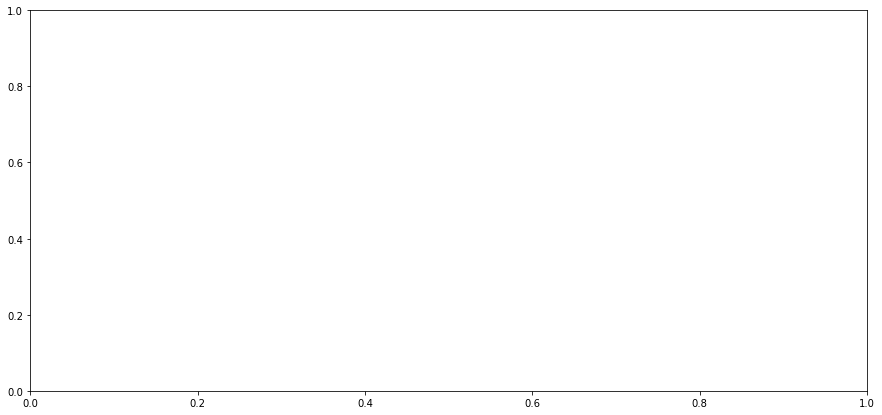

In [41]:
n = 15 # nr. of bins

fig = plt.subplots(figsize = (15,7))

plt.bar(sorted_avg_list[-10:], url_of_sorted_avg[-10:])
plt.title('Highest average time spent sites')
plt.xlabel('page id')
plt.ylabel('average time')
plt.show()